In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import plotly.express as px
import os
import pandas as pd

In [ ]:
# Téléchargement de l'image et chargement
image_path = tf.keras.utils.get_file(
    "flower.jpg",
    origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/flowers-324175_1920.jpg"
)

191416/191416 ━━━━━━━━━━━━━━━━━━━━ 1s 3us/step


In [ ]:
# Chargement et décodage de l'image
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)  # Décodage en RGB (channels=3)

In [ ]:
# Redimensionnement de l'image
img_resized = tf.image.resize(img, (img.shape[0]//2, img.shape[1]//2))

In [ ]:
# Visualisation avec Plotly
px.imshow(tf.cast(img_resized, tf.uint8)).show()

In [ ]:
# Transformation de l'image
img2 = tf.image.flip_left_right(img_resized)  # Flip horizontal
img3 = tf.image.flip_up_down(img_resized)    # Flip vertical
img4 = tf.image.adjust_brightness(img_resized, delta=0.2)  # Ajustement luminosité
img5 = tf.image.adjust_contrast(img_resized, contrast_factor=1.5)  # Ajustement contraste

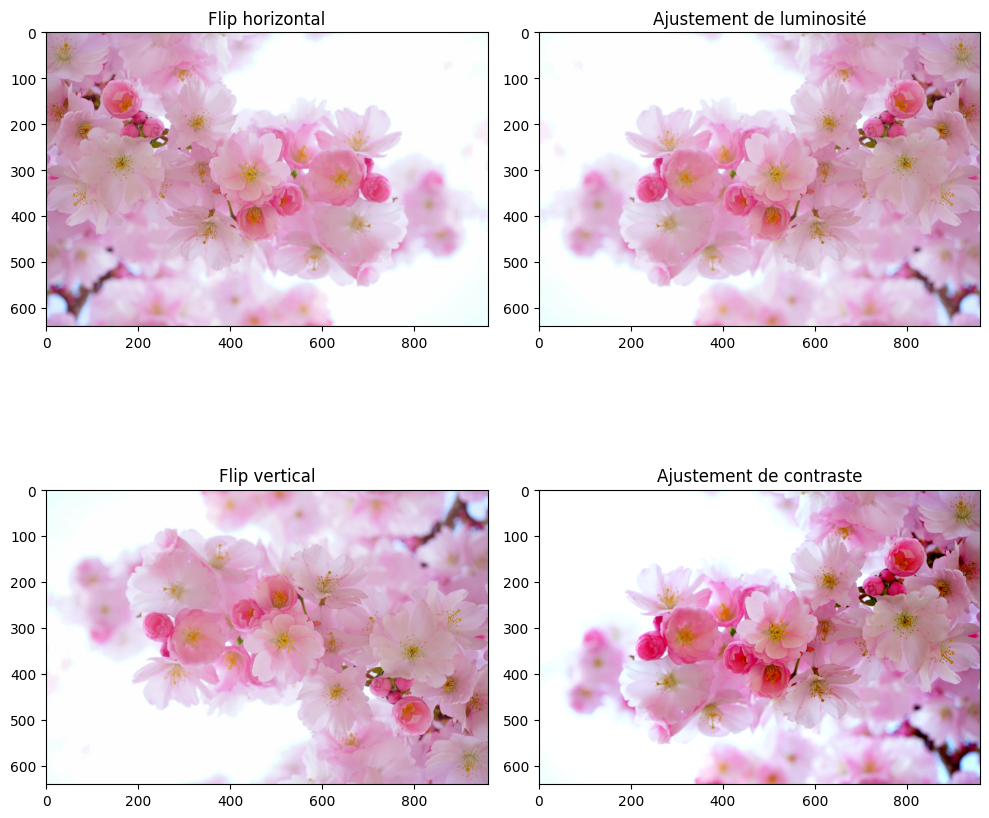

In [ ]:
# Visualisation des transformations avec Matplotlib
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img2 / 255.0)  # Normalisation pour la visualisation
ax[0, 0].set_title("Flip horizontal")
ax[1, 0].imshow(img3 / 255.0)
ax[1, 0].set_title("Flip vertical")
ax[0, 1].imshow(tf.clip_by_value(img4 / 255.0, 0, 1))  # Clip pour éviter des valeurs aberrantes
ax[0, 1].set_title("Ajustement de luminosité")
ax[1, 1].imshow(tf.clip_by_value(img5 / 255.0, 0, 1))
ax[1, 1].set_title("Ajustement de contraste")
plt.tight_layout()
plt.show()

In [ ]:
# Utilisation de l'ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(
    rotation_range=180,       # Rotation aléatoire
    width_shift_range=0.1,    # Décalage horizontal
    height_shift_range=0.1,   # Décalage vertical
    brightness_range=(0.5, 1),  # Modification de la luminosité
    shear_range=0.1,          # Cisaillement
    zoom_range=0.1,           # Zoom
    channel_shift_range=50.0, # Modification aléatoire des canaux
    horizontal_flip=True,     # Flip horizontal
    vertical_flip=True,       # Flip vertical
    rescale=1/255.0,          # Mise à l'échelle des pixels
    fill_mode='wrap',         # Remplissage des pixels manquants
    validation_split=0.3      # Fraction pour validation
)

In [ ]:
# Téléchargement et extraction du dataset depuis l'URL
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file(
    "catsNdogs.zip",
    origin=dataset_url,
    cache_dir="./",  # Cache dans le répertoire courant pour plus de clarté
    cache_subdir="datasets/cats_and_dogs",  # Organisation des fichiers
    extract=True  # Extraction automatique si fichier compressé
)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Création d'un générateur pour les données d'entraînement
directory_generator = img_generator.flow_from_directory(
    directory="./datasets/cats_and_dogs/cats_and_dogs_filtered/train",  # Chemin mis à jour pour les données d'entraînement
    target_size=(100, 100),  # Redimensionnement des images en (100, 100)
    class_mode="sparse",  # Les cibles sont des indices représentant les classes
    batch_size=16,  # Taille des lots générés
    shuffle=True,  # Mélange les fichiers après un cycle complet
    interpolation="bilinear"  # Interpolation pour le redimensionnement
)

# Création d'un générateur pour les données de validation
directory_generator_val = img_generator.flow_from_directory(
    directory="./datasets/cats_and_dogs/cats_and_dogs_filtered/validation",  # Chemin mis à jour pour les données de validation
    target_size=(100, 100),  # Redimensionnement des images en (100, 100)
    class_mode="sparse",  # Les cibles sont des indices représentant les classes
    batch_size=16,  # Taille des lots générés
    shuffle=False,  # Pas de mélange pour la validation
    interpolation="bilinear"  # Interpolation pour le redimensionnement
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


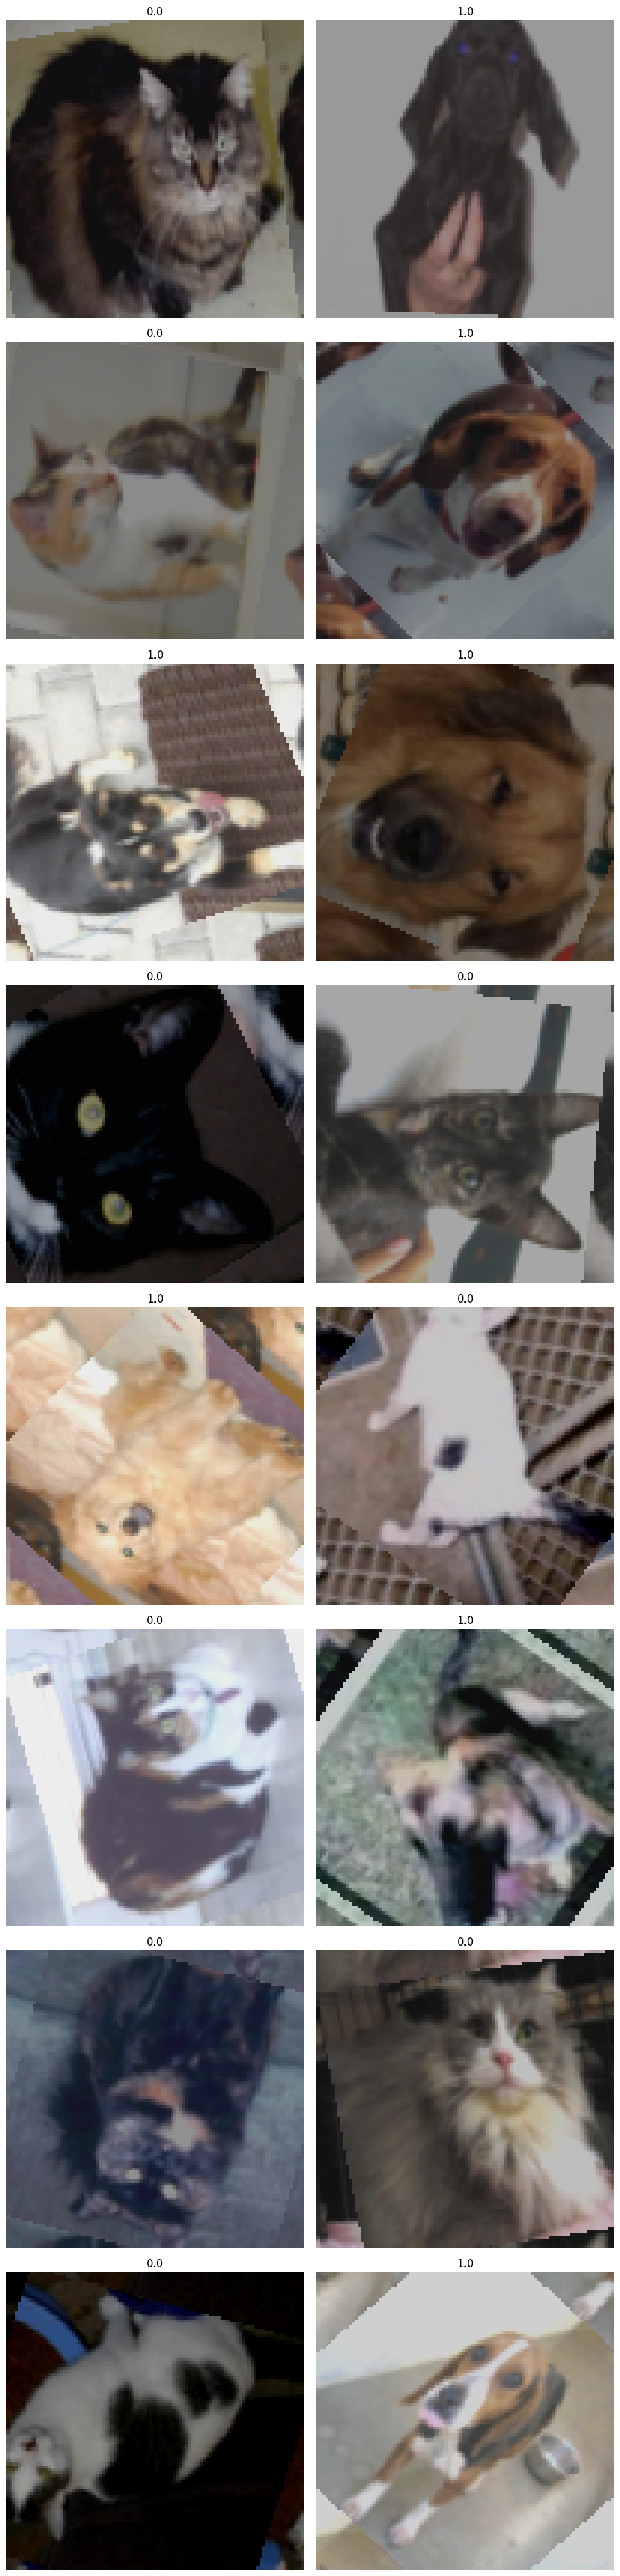

In [ ]:
# Extraction d'un lot d'images et de leurs cibles
imgs, targets = next(iter(directory_generator))

# Définition des dimensions de la grille (par exemple, 8 lignes et 2 colonnes)
fig, ax = plt.subplots(8, 2, figsize=(10, 40))

# Parcourir les images et les cibles
for i, (img, target) in enumerate(zip(imgs, targets)):
    row, col = divmod(i, 2)  # Calculer la position dans la grille (ligne, colonne)
    ax[row, col].imshow(img)  # Afficher l'image
    ax[row, col].title.set_text(str(target))  # Ajouter le titre avec la classe
    ax[row, col].axis("off")  # Supprimer les axes pour une visualisation propre

# Ajuster les espacements
plt.tight_layout()
plt.show()

In [ ]:
# First we download the .zip file containing all the images
tf.keras.utils.get_file("/content/cifar10.zip",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/cifar-10/train.zip",
                        extract=True,
                        cache_subdir="/content")

119728390/119728390 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


'/content/cifar10.zip'

In [ ]:
data = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/cifar-10/trainLabels.csv")
data.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
# Ajouter l'extension ".png" à la colonne "id"
data["id"] = data["id"].astype(str) + ".png"

# Vérifier le résultat après modification
print("\nDonnées après ajout de l'extension '.png' :")
print(data.head())


Données après ajout de l'extension '.png' :
      id       label
0  1.png        frog
1  2.png       truck
2  3.png       truck
3  4.png        deer
4  5.png  automobile


In [ ]:
df_generator = img_generator.flow_from_dataframe(
    dataframe=data, # the dataframe containing the filename and label column
    directory="/content/train", # the directory containing the image files
    x_col="id", # the name of the column with the filenames
    y_col="label", # the name of the column with the labels
    target_size=(32,32),
    class_mode = "sparse",
    batch_size=16,
    shuffle = True
)

Found 50000 validated image filenames belonging to 10 classes.


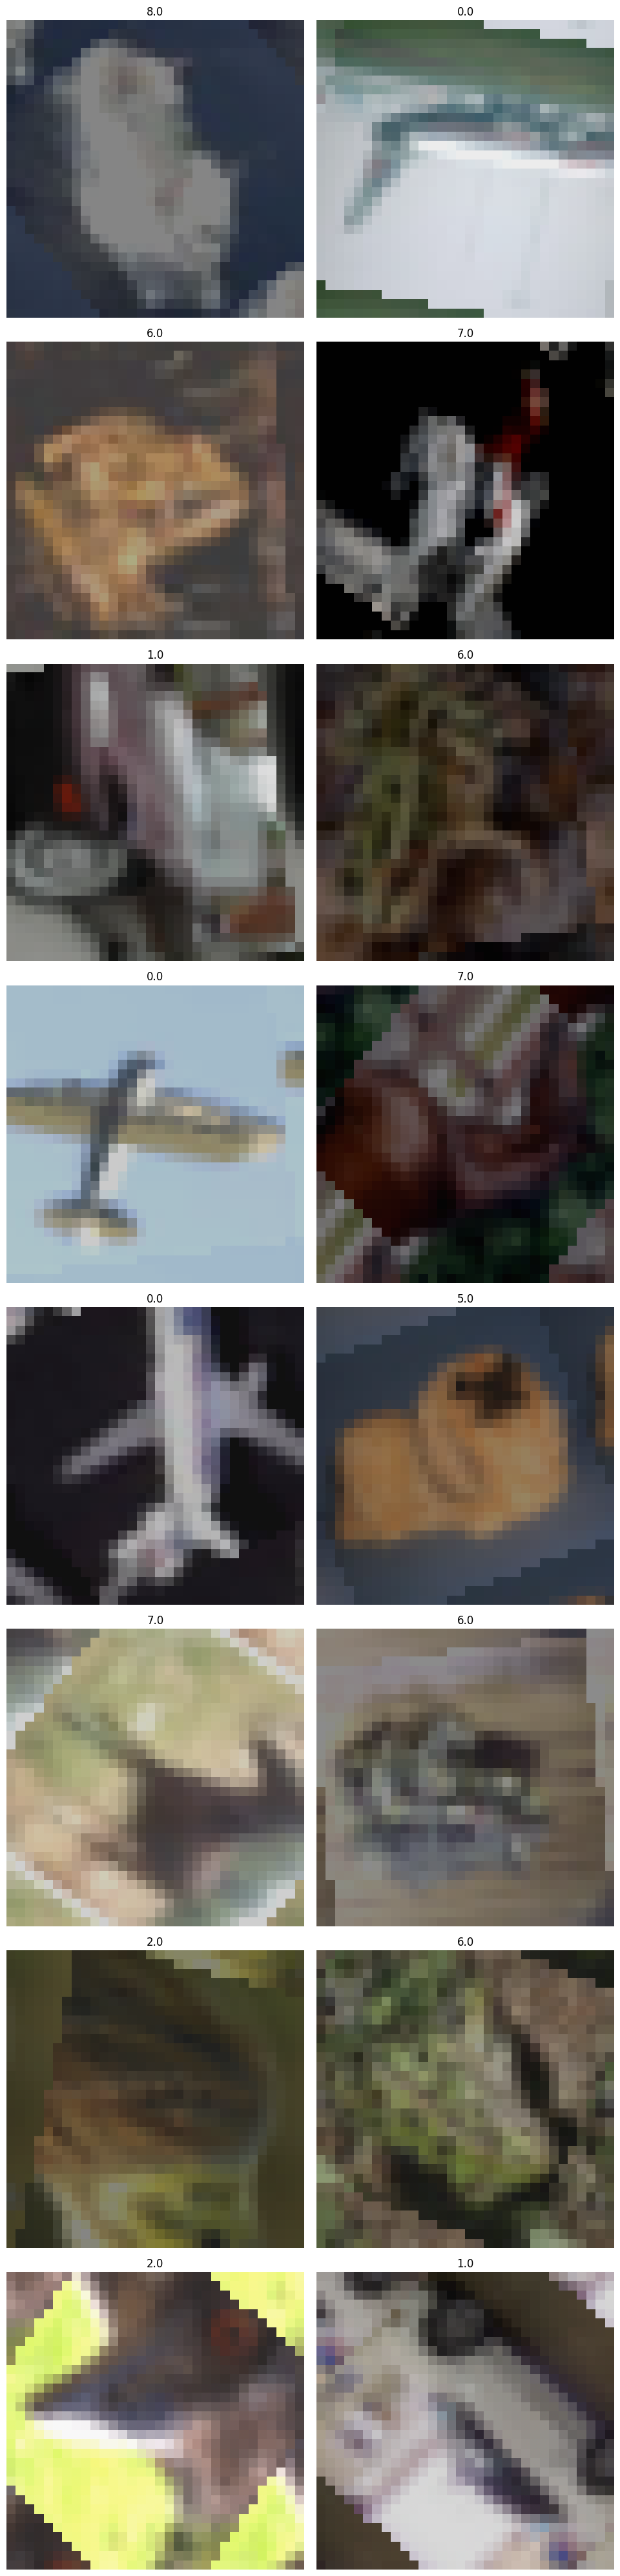

In [ ]:
# Générer un batch d'images et de cibles
imgs, targets = next(iter(df_generator))

# Définir une grille avec 8 lignes et 2 colonnes
fig, ax = plt.subplots(8, 2, figsize=(10, 40))

# Parcourir les images et leurs cibles
for i, (img, target) in enumerate(zip(imgs, targets)):
    row, col = divmod(i, 2)  # Calculer la position dans la grille (ligne, colonne)
    ax[row, col].imshow(img)  # Afficher l'image
    ax[row, col].title.set_text(str(target))  # Ajouter la classe en titre
    ax[row, col].axis("off")  # Supprimer les axes pour une meilleure lisibilité

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv1D, Conv2D, Conv3D

# Définition d'une couche de convolution 1D
conv1d = Conv1D(
    filters=16,               # Nombre de filtres (ou "neurons")
    kernel_size=5,            # Taille du noyau de convolution (1D)
    strides=1,                # Décalage du filtre à chaque pas
    padding="valid",          # "valid" : pas de padding ; "same" : conserve la taille d'entrée
    activation="relu",        # Fonction d'activation utilisée
    kernel_regularizer=None   # Pas de régularisation pour les poids (peut être L1 ou L2)
)

# Définition d'une couche de convolution 2D
conv2d = Conv2D(
    filters=16,               # Nombre de filtres
    kernel_size=(3, 3),       # Taille du noyau en hauteur et largeur
    strides=(1, 1),           # Décalage des filtres dans les deux dimensions
    padding="valid",          # "valid" : pas de padding ; "same" : conserve la taille d'entrée
    activation="relu",        # Fonction d'activation utilisée
    kernel_regularizer=None   # Pas de régularisation pour les poids
)

# Définition d'une couche de convolution 3D
conv3d = Conv3D(
    filters=16,               # Nombre de filtres
    kernel_size=(3, 3, 3),    # Taille du noyau en profondeur, hauteur et largeur
    strides=(1, 1, 1),        # Décalage des filtres dans les trois dimensions
    padding="valid",          # "valid" : pas de padding ; "same" : conserve la taille d'entrée
    activation="relu",        # Fonction d'activation utilisée
    kernel_regularizer=None   # Pas de régularisation pour les poids
)

In [ ]:
# Récupération d'un batch d'images et des cibles
imgs, targets = next(iter(directory_generator))

# Définition du modèle convolutionnel
modelconv = tf.keras.Sequential([
    Conv2D(
        filters=32,                  # 32 filtres pour extraire des caractéristiques locales
        kernel_size=(3, 3),          # Taille de la "fenêtre" (noyau de convolution)
        strides=2,                   # Décalage des filtres de 2 pixels à chaque étape
        padding="same",              # Padding pour conserver la taille de sortie (zéro-padding si nécessaire)
        activation="relu",           # Fonction d'activation ReLU
        input_shape=(imgs.shape[1], imgs.shape[2], imgs.shape[3])  # Dimensions de l'entrée : (hauteur, largeur, canaux)
    ),
    Conv2D(
        filters=64,                  # Augmentation du nombre de filtres pour apprendre des caractéristiques plus complexes
        kernel_size=(3, 3),          # Fenêtre de convolution 3x3
        strides=2,                   # Décalage de 2 pixels
        padding="same",
        activation="relu"
    ),
    Conv2D(
        filters=64,                  # Même nombre de filtres pour approfondir les caractéristiques
        kernel_size=(3, 3),
        strides=2,
        padding="same",
        activation="relu"
    ),
    Conv2D(
        filters=128,                 # Augmentation du nombre de filtres pour capturer des caractéristiques encore plus complexes
        kernel_size=(3, 3),
        strides=2,
        padding="same",
        activation="relu"
    ),
    Flatten(),                       # Conversion des caractéristiques en un vecteur plat
    Dense(1, activation="sigmoid")   # Couche dense avec 1 neurone pour une classification binaire
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
modelconv.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,449 (533.00 KB)

 Trainable params: 136,449 (533.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation du modèle
modelconv.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimiseur Adam avec un taux d'apprentissage explicite
    loss=BinaryCrossentropy(),           # Fonction de perte pour la classification binaire
    metrics=[BinaryAccuracy()]           # Précision binaire comme métrique
)

# Entraînement du modèle
history = modelconv.fit(
    directory_generator,                 # Générateur de données d'entraînement
    epochs=100,                          # Nombre d'époques
    validation_data=directory_generator_val,  # Générateur de validation
    verbose=1                            # Affichage du journal d'entraînement
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 183ms/step - binary_accuracy: 0.5147 - loss: 0.6932 - val_binary_accuracy: 0.5010 - val_loss: 0.6931
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - binary_accuracy: 0.4767 - loss: 0.6933 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - binary_accuracy: 0.5281 - loss: 0.6911 - val_binary_accuracy: 0.5000 - val_loss: 0.7179
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - binary_accuracy: 0.5191 - loss: 0.6939 - val_binary_accuracy: 0.5520 - val_loss: 0.6756
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - binary_accuracy: 0.5698 - loss: 0.6646 - val_binary_accuracy: 0.5690 - val_loss: 0.6793
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - binary_accuracy: 0.6154 - loss: 0.6646 - val_binary_accuracy: 0.5780 - val_loss: 0.6581
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - binary_accuracy: 0.6007 - loss: 0.6476 - val_binary_accuracy: 0.5740 - val_los

In [ ]:
modelconv.save("/content/modelconvCNNlecture.h5")

In [ ]:
tf.keras.utils.get_file("/content/modelconvCNNlecture.h5",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/modelconvCNNlecture.h5")

'/content/modelconvCNNlecture.h5'

In [ ]:
modelconv = tf.keras.models.load_model("/content/modelconvCNNlecture.h5")

In [ ]:
from plotly import graph_objects as go

In [ ]:
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

history = modelconv.history
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

AttributeError: 'Sequential' object has no attribute 'history'

POOLING

In [ ]:
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D
modelconvpool = tf.keras.Sequential(
    [
     Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu", input_shape = (imgs.shape[1], imgs.shape[2], imgs.shape[3])), # the input shape (height, width, channels)
     MaxPool2D(pool_size=2, # the size of the pooling window
               strides=2), # the movement of the pooling on the input
     Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu"),
     MaxPool2D(2,2),
     Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu"),
     MaxPool2D(2,2),
     Conv2D(filters = 128, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu"),
     MaxPool2D(2,2),
     tf.keras.layers.Flatten(), # this layer turns multi-dimensional images into flat objects
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

In [ ]:
modelconvpool.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           4,609 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,785 (526.50 KB)

 Trainable params: 134,785 (526.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelconvpool.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

modelconvpool.fit(directory_generator, epochs = 100, validation_data=directory_generator_val)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - binary_accuracy: 0.5144 - loss: 0.6942 - val_binary_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 136ms/step - binary_accuracy: 0.5144 - loss: 0.6928 - val_binary_accuracy: 0.5570 - val_loss: 0.6802
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - binary_accuracy: 0.5578 - loss: 0.6852 - val_binary_accuracy: 0.6000 - val_loss: 0.6707
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - binary_accuracy: 0.5656 - loss: 0.6776 - val_binary_accuracy: 0.5590 - val_loss: 0.6772
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - binary_accuracy: 0.5733 - loss: 0.6702 - val_binary_accuracy: 0.5140 - val_loss: 0.6914
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - binary_accuracy: 0.5482 - loss: 0.6890 - val_binary_accuracy: 0.5760 - val_loss: 0.6877
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 171ms/step - binary_accuracy: 0.5809 - loss: 0.6707 - val_binary_accuracy: 0.60

In [ ]:
modelconvpool.save("/content/modelconvpoolCNNlecture.h5")

In [ ]:
tf.keras.utils.get_file("/content/modelconvpoolCNNlecture.h5",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/modelconvpoolCNNlecture.h5")

'/content/modelconvpoolCNNlecture.h5'

In [ ]:
modelconvpool = tf.keras.models.load_model("/content/modelconvpoolCNNlecture.h5"

SyntaxError: incomplete input (<ipython-input-31-152b2a64dcb0>, line 1)

In [ ]:
history = modelconvpool.history
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()